# Pet Facial Expressions

In [6]:
# Importing necessary libraries EDA in Google Colab
import pandas as pd

# Importing Google Colab's drive module to access Google Drive files
from google.colab import drive

# Mounting Google Drive to the current Colab session to access stored datasets
# The 'force_remount=True' option ensures that the drive is remounted for each execution of the cell
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [1]:
!pip install tensorflow==2.9.1

In [28]:
# Import essential system libraries
import os
import time
import shutil
import pathlib
import itertools

# Importing libraries for data handling and visualization
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Importing TensorFlow and Keras for Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [25]:
# Reading and Organizing Data for Analysis

# Define the directory path to the dataset
data_dir = '/content/gdrive/MyDrive/Capstone Project/PetFacialDataset/archive (1)'

# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Loop through each sub-folder in the dataset directory
folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Creating a pandas DataFrame to hold file paths and labels
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

# STAGE 1 EDA

In [23]:
# EDA Q1: How is the data distribution
df.head(5)

,filepaths,labels
0,/content/gdrive/MyDrive/Capstone Project/PetFa...,Sad
1,/content/gdrive/MyDrive/Capstone Project/PetFa...,Sad
2,/content/gdrive/MyDrive/Capstone Project/PetFa...,Sad
3,/content/gdrive/MyDrive/Capstone Project/PetFa...,Sad
4,/content/gdrive/MyDrive/Capstone Project/PetFa...,Sad


In [ ]:
df.tail(5)

,filepaths,labels
998,/content/drive/MyDrive/Capstone Project/PetFac...,Other
999,/content/drive/MyDrive/Capstone Project/PetFac...,Other
1000,/content/drive/MyDrive/Capstone Project/PetFac...,Other
1001,/content/drive/MyDrive/Capstone Project/PetFac...,Other
1002,/content/drive/MyDrive/Capstone Project/PetFac...,Other


In [24]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  1003 non-null   object
 1   labels     1003 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


(<matplotlib.image.AxesImage at 0x7fe9ad9f7190>,
 Text(0.5, 1.0, 'Original image\n Sad Rooster'))

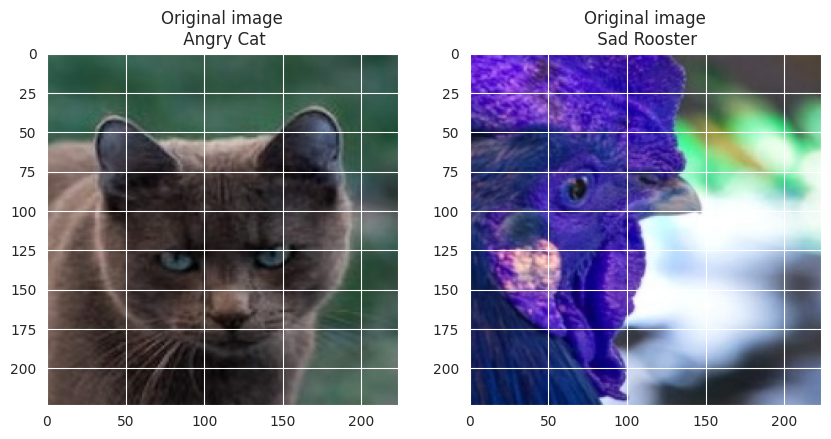

In [43]:
# EDA Q2: How do images from different classes look like (Read and Display Images)

# Importing necessary libraries for image processing and visualization
import cv2
import matplotlib.pyplot as plt

# Configuring Matplotlib to display images inline
%matplotlib inline

# Defining the file paths for two images
img_path_1 = '/content/gdrive/MyDrive/Capstone Project/PetFacialDataset/archive (1)/Angry/04.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/gdrive/MyDrive/Capstone Project/PetFacialDataset/archive (1)/Sad/005.jpg'
img_2 = cv2.imread(img_path_2)

# Setting up the figure for displaying the images
plt.figure(figsize=(10, 10))

# Displaying Images
plt.subplot(121)
plt.imshow(img_1),plt.title('Original image\n Angry Cat')
plt.subplot(122)
plt.imshow(img_2),plt.title('Original image\n Sad Rooster')



(<matplotlib.image.AxesImage at 0x7fe9ad9be8c0>,
 Text(0.5, 1.0, 'Transposed image\n Sad Rooster'))

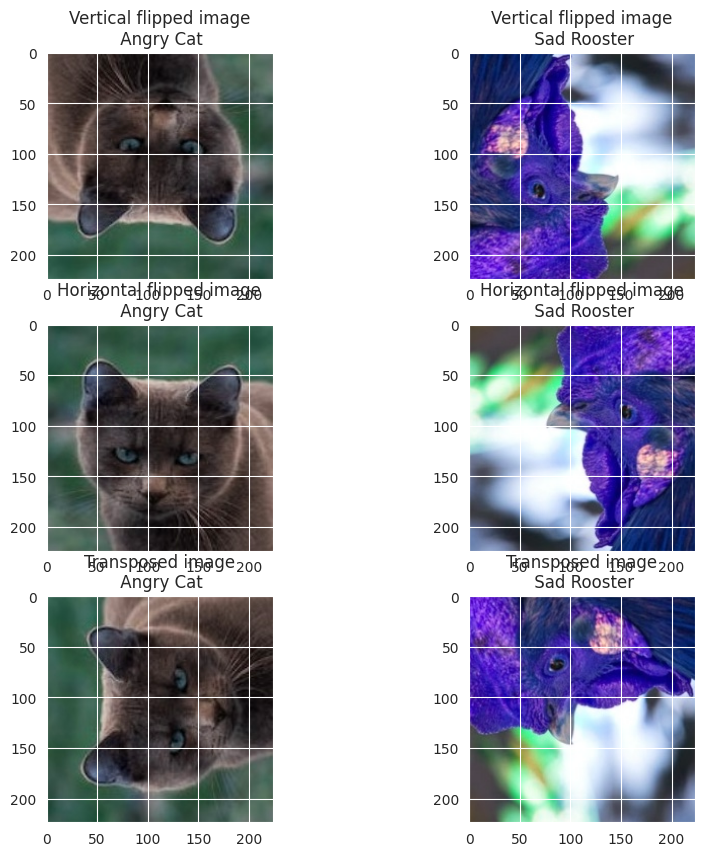

In [44]:
# EDA Q3 - How does the images from different classes look like with geometrical transformations (vertical flipping, horizontal flipping, transposing)

# Importing libraries for image processing and visualization
import cv2
import matplotlib.pyplot as plt

# Configuring Matplotlib to display images inline
%matplotlib inline

# Defining the file paths for two images
img_path_1 = '/content/gdrive/MyDrive/Capstone Project/PetFacialDataset/archive (1)/Angry/04.jpg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/gdrive/MyDrive/Capstone Project/PetFacialDataset/archive (1)/Sad/005.jpg'
img_2 = cv2.imread(img_path_2)

# Performing basic image manipulations: flipping and transposing
flip_img_v1=cv2.flip(img_1,0) # Vertically flipping the image
flip_img_v2=cv2.flip(img_2,0) # Vertically flipping the image
flip_img_h1=cv2.flip(img_1,1) # Horizontally flipping the image
flip_img_h2=cv2.flip(img_2,1) # Horizontally flipping the image
transp_img_1=cv2.transpose(img_1,1) # Transposes the image
transp_img_2=cv2.transpose(img_2,1) # Transposes the image

# Setting up the figure for displaying the images
plt.figure(figsize=(10,10))

# Displaying the vertically flipped images
plt.subplot(321)
plt.imshow(flip_img_v1),plt.title('Vertical flipped image\n Angry Cat')
plt.subplot(322)
plt.imshow(flip_img_v2),plt.title('Vertical flipped image\n Sad Rooster')

# Displaying the horizontally flipped images
plt.subplot(323)
plt.imshow(flip_img_h1), plt.title('Horizontal flipped image\n Angry Cat')
plt.subplot(324)
plt.imshow(flip_img_h2), plt.title('Horizontal flipped image\n Sad Rooster')

# Displaying the transposed images
plt.subplot(325)
plt.imshow(transp_img_1),plt.title('Transposed image\n Angry Cat')
plt.subplot(326)
plt.imshow(transp_img_2),plt.title('Transposed image\n Sad Rooster')





In [39]:
# EDA Q4: How much data can be used for training, validation and testing?

# Splitting the DataFrame into Train, Validation, and Test Sets

# Train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# Valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)

In [45]:
# EDA Q5: Can we visualise the data?

# Setting Up Image Data Generators for Visualizing and Preprocessing the Data

# Defining basic parameters for image processing
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# This ensures efficient processing during testing and limits batch size to 80.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# Function for the ImageDataGenerator,returns the input image unmodified
def scalar(img):
    return img

# Creating ImageDataGenerator instances for training and testing
# These generators apply the custom preprocessing function 'scalar' during image augmentation
tr_gen = ImageDataGenerator(preprocessing_function= scalar)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)

# Setting up the training data generator
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Setting up the validation data generator
valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Setting up the test data generator with the custom test_batch_size and shuffle set to False
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)

Found 799 validated image filenames belonging to 4 classes.
Found 120 validated image filenames belonging to 4 classes.
Found 81 validated image filenames belonging to 4 classes.


In [47]:
# EDA Q6: How does the samples from the training subset look like ?

g_dict = train_gen.class_indices      # Retrieves a dictionary mapping class names to their numeric indices
classes = list(g_dict.keys())      # Extracts class names as a list of strings
images, labels = next(train_gen)       # retrieves the next batch of images and labels

# Setting up the figure for displaying the images
plt.figure(figsize= (20, 20))

# Looping through the first 16 images in the batch to display them
for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # Scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # Get the index of the image
    class_name = classes[index]   # Get the class of the image

    # Adding the class name as the title of the subplot
    plt.title(class_name, color= 'blue', fontsize= 12)

    # Turning off the axis for a cleaner look
    plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.